In [48]:
#Import potrzebnych bibliotekimport pandas as pd
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#import do zmiennaj df_train_csv pliku csv z danymi treningowymi, ustawienie przecinka jako separaotra. 
df_train_csv = pd.read_csv("train.csv", sep=",", na_values=["n/a"])
#Usunięcie kolumny "data"
del df_train_csv['data']
#utworzenie listy kolumn, które moją być w kolejnych krokach wykorzystywane.
features = ['id','idsito','idmodel','idbrand','lat','lon','ageinmonths','anno','day','ora','temperatura_ambiente','irradiamento','pressure','windspeed','humidity','icon','dewpoint','windbearing','cloudcover','tempi','irri','pressurei','windspeedi','humidityi','dewpointi','windbearingi','cloudcoveri','dist','altitude','azimuth','altitudei','azimuthi','irr_pvgis_mod','irri_pvgis_mod','kwh']
#utworzenie dataframu, czyli zbioru danych z zawężonym zbiorem kolumn.
df_train_set = df_train_csv[features]
#zapoznanie się ze zbiorem danych, poprzez wyświetlenie pierwszych 5 rekordów.
df_train_set.head()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,irr_pvgis_mod,irri_pvgis_mod,kwh
0,97595,0.425,0.083,0.083,0.437,0.631,1.000,2012,0.003,0.0,...,0.422,0.200,0.983607,0.118,0.148,0.520,0.813,0.0,0.189,0.0
1,97606,0.250,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.374,0.329,0.983607,0.117,0.147,0.508,0.780,0.0,0.200,0.0
2,97637,0.350,0.375,0.000,0.439,0.626,0.000,2012,0.003,0.0,...,0.336,0.201,0.983607,0.118,0.147,0.520,0.825,0.0,0.158,0.0
3,97646,0.325,0.292,0.167,0.440,0.612,0.250,2012,0.003,0.0,...,0.351,0.198,0.983607,0.118,0.145,0.507,0.782,0.0,0.204,0.0
4,97772,0.000,0.000,0.333,0.436,0.626,0.719,2012,0.003,0.0,...,0.422,0.320,0.983607,0.117,0.147,0.504,0.780,0.0,0.199,0.0


In [50]:
#wyświetlenie szczegółowych statystyk dotyczących poszczególnych kolumn zbioru danych.
df_train_set.describe()
#Zapoznanie się z wymiarem zbioru treningowego
df_train_set.shape
#Zapoznanie się z wymiarem zbioru testowego
df_train_set.shape

(235790, 35)

In [51]:
#Utworzenie obiektu "MinMazScaler", przkształca wartości poprzez skalowanie każdej kolumny do określonego zakresu.
min_max_scaler = preprocessing.MinMaxScaler()
#Dopasowanie danych oraz przekształcenie.
x_scaled = min_max_scaler.fit_transform(df_train_set[features])
#Uruchomienie normalizacji na danych.
df_train = pd.DataFrame(x_scaled)
#Wyświetlenie pierwszy pięciu rekordów ze zbioru "df_train".
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.352979,1.000000,0.110667,0.199041,0.159420,0.888268,1.000,0.0,0.003,0.0,...,0.422,0.200,0.983607,0.009056,0.028986,0.529532,0.813,0.0,0.207565,0.0
1,0.353018,0.588235,0.277333,0.199041,0.159420,0.867784,0.063,0.0,0.003,0.0,...,0.374,0.329,0.983607,0.007762,0.027536,0.517312,0.780,0.0,0.218235,0.0
2,0.353131,0.823529,0.500000,0.000000,0.173913,0.878957,0.000,0.0,0.003,0.0,...,0.336,0.201,0.983607,0.009056,0.027536,0.529532,0.825,0.0,0.177498,0.0
3,0.353163,0.764706,0.389333,0.400480,0.181159,0.852886,0.250,0.0,0.003,0.0,...,0.351,0.198,0.983607,0.009056,0.024638,0.516293,0.782,0.0,0.222114,0.0
4,0.353619,0.000000,0.000000,0.798561,0.152174,0.878957,0.719,0.0,0.003,0.0,...,0.422,0.320,0.983607,0.007762,0.027536,0.513238,0.780,0.0,0.217265,0.0


In [52]:
#Ponieważ po normalizacji danych, kolumny pozbawione zostały swoich nazw, zostaną one podownie dodane (tzn. nazwy kolumn).
df_train.columns = features
#Wyświetlenie wyniku końcowego (pierwszych pięciu wierszy przekształconego zbioru danych).
df_train.head()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,irr_pvgis_mod,irri_pvgis_mod,kwh
0,0.352979,1.000000,0.110667,0.199041,0.159420,0.888268,1.000,0.0,0.003,0.0,...,0.422,0.200,0.983607,0.009056,0.028986,0.529532,0.813,0.0,0.207565,0.0
1,0.353018,0.588235,0.277333,0.199041,0.159420,0.867784,0.063,0.0,0.003,0.0,...,0.374,0.329,0.983607,0.007762,0.027536,0.517312,0.780,0.0,0.218235,0.0
2,0.353131,0.823529,0.500000,0.000000,0.173913,0.878957,0.000,0.0,0.003,0.0,...,0.336,0.201,0.983607,0.009056,0.027536,0.529532,0.825,0.0,0.177498,0.0
3,0.353163,0.764706,0.389333,0.400480,0.181159,0.852886,0.250,0.0,0.003,0.0,...,0.351,0.198,0.983607,0.009056,0.024638,0.516293,0.782,0.0,0.222114,0.0
4,0.353619,0.000000,0.000000,0.798561,0.152174,0.878957,0.719,0.0,0.003,0.0,...,0.422,0.320,0.983607,0.007762,0.027536,0.513238,0.780,0.0,0.217265,0.0


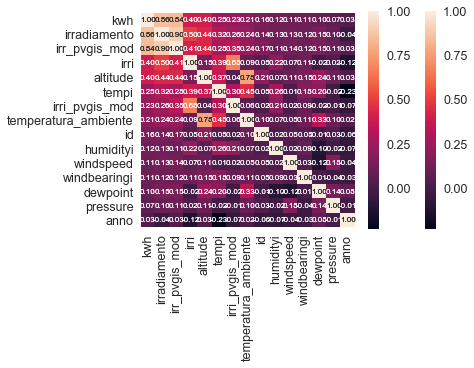

In [53]:
#Sporządzenie korelacji danych, w celu dokonania ponownej analizy zbioru danych
corr = df_train.corr()
#corr
k = 15 #liczba zmiennych dla mapy termicznej
cols = corr.nlargest(k, 'kwh')['kwh'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [54]:
#Podzielenie zbioru danych treningowych, na dane wykorzytywane do predykcji.
#feature_list1 to lista zawierająca kolumny, które podane będą do predykcji. 
feature_list1 = ['id','idsito','idmodel','idbrand','lat','lon','ageinmonths','anno','day','ora','temperatura_ambiente','irradiamento','pressure','windspeed','humidity','icon','dewpoint','windbearing','cloudcover','tempi','irri','pressurei','windspeedi','humidityi','dewpointi','windbearingi','cloudcoveri','dist','altitude','azimuth','altitudei','azimuthi','irr_pvgis_mod','irri_pvgis_mod']
df_train_X = df_train[feature_list1]
#Wyświetlenie pierwszych 30 rekordów.
df_train_X.head(30)

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,dewpointi,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,irr_pvgis_mod,irri_pvgis_mod
0,0.352979,1.000000,0.110667,0.199041,0.159420,0.888268,1.000,0.0,0.003,0.000,...,0.144886,0.422,0.200,0.983607,0.009056,0.028986,0.529532,0.813,0.0,0.207565
1,0.353018,0.588235,0.277333,0.199041,0.159420,0.867784,0.063,0.0,0.003,0.000,...,0.355114,0.374,0.329,0.983607,0.007762,0.027536,0.517312,0.780,0.0,0.218235
2,0.353131,0.823529,0.500000,0.000000,0.173913,0.878957,0.000,0.0,0.003,0.000,...,0.392045,0.336,0.201,0.983607,0.009056,0.027536,0.529532,0.825,0.0,0.177498
3,0.353163,0.764706,0.389333,0.400480,0.181159,0.852886,0.250,0.0,0.003,0.000,...,0.303977,0.351,0.198,0.983607,0.009056,0.024638,0.516293,0.782,0.0,0.222114
4,0.353619,0.000000,0.000000,0.798561,0.152174,0.878957,0.719,0.0,0.003,0.000,...,0.144886,0.422,0.320,0.983607,0.007762,0.027536,0.513238,0.780,0.0,0.217265
5,0.377924,0.882353,0.556000,0.000000,0.992754,0.000000,0.125,0.0,0.003,0.000,...,0.167614,0.333,0.202,0.983607,0.036223,0.053623,0.543788,0.769,0.0,0.216295
6,0.378054,0.941176,0.610667,0.000000,1.000000,0.011173,0.125,0.0,0.003,0.000,...,0.167614,0.333,0.202,0.983607,0.036223,0.052174,0.543788,0.769,0.0,0.216295
7,0.378318,0.294118,0.222667,0.400480,0.000000,1.000000,0.000,0.0,0.003,0.000,...,0.144886,0.336,0.196,0.983607,0.005175,0.042029,0.096741,0.207,0.0,0.177498
8,0.378448,0.529412,0.277333,0.199041,0.159420,0.867784,0.063,0.0,0.003,0.000,...,0.335227,0.339,0.280,0.983607,0.009056,0.027536,0.518330,0.780,0.0,0.217265
9,0.612087,0.176471,0.110667,0.199041,0.159420,0.875233,1.000,0.0,0.003,0.000,...,0.394886,0.418,0.200,0.983607,0.007762,0.027536,0.513238,0.789,0.0,0.219205


In [55]:
#Wydobycie ze zbioru danych treningowych, kolumny celu (tzn. target), którego wartości będą miały 
#zostać prognozowane prze regresor. W naszym przypadku będzie to kolumna 'kwh' odpowiadająca wartości 
#wygenerowanej enegii w jednej godzinie.
df_train_Y = df_train['kwh']
df_train_Y.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: kwh, dtype: float64

In [59]:
#Import do zmiennaj df_test_csv pliku csv z danymi testowymi, ustawienie przecinka jako separaotra. 
df_test1 = pd.read_csv("test.csv", sep=",", na_values=["n/a"])
#Usunięcie kolumny "data" ze zbioru.
del df_test1['data']
#Utworzenie listy kolumn, które moją być w kolejnych krokach wykorzystywane.
features2 = ['id','idsito','idmodel','idbrand','lat','lon','ageinmonths','anno','day','ora','temperatura_ambiente','irradiamento','pressure','windspeed','humidity','icon','dewpoint','windbearing','cloudcover','tempi','irri','pressurei','windspeedi','humidityi','dewpointi','windbearingi','cloudcoveri','dist','altitude','azimuth','altitudei','azimuthi','irr_pvgis_mod','irri_pvgis_mod']
#utworzenie dataframu, czyli zbioru danych z zawężonym zbiorem kolumn.
df_test2 = df_test1[features2]
#zapoznanie się ze zbiorem danych, poprzez wyświetlenie pierwszych 5 rekordów.
df_test2.head()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,dewpointi,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,irr_pvgis_mod,irri_pvgis_mod
0,34255,0.150,0.167,0.167,0.438,0.630,0.000,2014,0.0,0.0,...,0.114,0.336,0.196,1.0,0.117,0.147,0.095,0.207,0.000,0.086
1,34282,0.050,0.125,0.417,0.437,0.622,0.844,2014,0.0,0.0,...,0.114,0.336,0.196,1.0,0.117,0.146,0.878,0.714,0.000,0.086
2,34375,0.375,0.417,0.000,0.552,0.154,0.125,2014,0.0,0.0,...,0.114,0.336,0.196,1.0,0.139,0.166,1.000,0.695,0.000,0.086
3,34572,0.275,0.167,0.167,0.437,0.622,0.000,2014,0.0,0.0,...,0.114,0.336,0.196,1.0,0.117,0.146,0.880,0.711,0.000,0.086
4,34660,0.300,0.250,0.250,0.440,0.585,0.250,2014,0.0,0.0,...,0.114,0.336,0.196,1.0,0.117,0.141,0.095,0.207,0.001,0.086


In [60]:
#Utworzenie obiektu "MinMazScaler", przkształca wartości poprzez skalowanie każdej kolumny do określonego zakresu.
min_max_scaler = preprocessing.MinMaxScaler()
#Dopasowanie danych oraz przekształcenie.
x_scaled = min_max_scaler.fit_transform(df_test2[features2])
#Uruchomienie normalizacji na danych.
df_test = pd.DataFrame(x_scaled)
#Wyświetlenie wyniku końcowego (pierwszych pięciu wierszy przekształconego zbioru danych).
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.003096,0.352941,0.222667,0.40048,0.166667,0.886406,0.000,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.027941,0.061203,0.208955,0.000000,0.086
1,0.003759,0.117647,0.166667,1.00000,0.159420,0.871508,0.844,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.873444,0.839552,0.000000,0.086
2,0.006045,0.882353,0.556000,0.00000,0.992754,0.000000,0.125,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.034014,0.055882,1.000000,0.815920,0.000000,0.086
3,0.010885,0.647059,0.222667,0.40048,0.159420,0.871508,0.000,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.875519,0.835821,0.000000,0.086
4,0.013048,0.705882,0.333333,0.59952,0.181159,0.802607,0.250,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.019118,0.061203,0.208955,0.001905,0.086


In [61]:
#Ponieważ po normalizacji danych, kolumny pozbawione zostały swoich nazw, zostaną one podownie dodane (tzn. nazwy kolumn).
df_test.columns = features2
#Wyświetlenie wyniku końcowego (pierwszych pięciu wierszy przekształconego zbioru danych).
df_test.head()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,dewpointi,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,irr_pvgis_mod,irri_pvgis_mod
0,0.003096,0.352941,0.222667,0.40048,0.166667,0.886406,0.000,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.027941,0.061203,0.208955,0.000000,0.086
1,0.003759,0.117647,0.166667,1.00000,0.159420,0.871508,0.844,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.873444,0.839552,0.000000,0.086
2,0.006045,0.882353,0.556000,0.00000,0.992754,0.000000,0.125,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.034014,0.055882,1.000000,0.815920,0.000000,0.086
3,0.010885,0.647059,0.222667,0.40048,0.159420,0.871508,0.000,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.875519,0.835821,0.000000,0.086
4,0.013048,0.705882,0.333333,0.59952,0.181159,0.802607,0.250,0.0,0.0,0.0,...,0.114,0.363636,0.241791,1.0,0.004082,0.019118,0.061203,0.208955,0.001905,0.086


In [62]:
#Podzielenie zbioru danych testowych, na dane do predykcji.
#feature_list to lista zawierająca kolumny, które podane będą do predykcji. 
feature_list2 = ['id','idsito','idmodel','idbrand','lat','lon','ageinmonths','anno','day','ora','temperatura_ambiente','irradiamento','pressure','windspeed','humidity','icon','dewpoint','windbearing','cloudcover','tempi','irri','pressurei','windspeedi','humidityi','dewpointi','windbearingi','cloudcoveri','dist','altitude','azimuth','altitudei','azimuthi','irr_pvgis_mod','irri_pvgis_mod']
df_test_X = df_test[feature_list2]
#Wyświetlenie pierwszych 30 rekordów.
df_test_X.head(30)

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,dewpointi,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,irr_pvgis_mod,irri_pvgis_mod
0,0.003096,0.352941,0.222667,0.400480,0.166667,0.886406,0.000,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.027941,0.061203,0.208955,0.000000,0.086
1,0.003759,0.117647,0.166667,1.000000,0.159420,0.871508,0.844,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.873444,0.839552,0.000000,0.086
2,0.006045,0.882353,0.556000,0.000000,0.992754,0.000000,0.125,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.034014,0.055882,1.000000,0.815920,0.000000,0.086
3,0.010885,0.647059,0.222667,0.400480,0.159420,0.871508,0.000,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.875519,0.835821,0.000000,0.086
4,0.013048,0.705882,0.333333,0.599520,0.181159,0.802607,0.250,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.019118,0.061203,0.208955,0.001905,0.086
5,0.015529,0.823529,0.500000,0.000000,0.173913,0.878957,0.000,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.027941,0.874481,0.837065,0.000000,0.086
6,0.016832,0.588235,0.277333,0.199041,0.159420,0.867784,0.063,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.886929,0.828358,0.000000,0.086
7,0.018650,0.529412,0.277333,0.199041,0.159420,0.867784,0.063,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.026471,0.876556,0.839552,0.000000,0.086
8,0.019264,0.941176,0.610667,0.000000,1.000000,0.011173,0.125,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.034014,0.054412,1.000000,0.815920,0.000000,0.086
9,0.021083,0.058824,1.000000,0.798561,0.159420,0.888268,0.844,0.0,0.0,0.000,...,0.114,0.363636,0.241791,1.0,0.004082,0.027941,0.874481,0.834577,0.000000,0.086


In [63]:
#Utworzenie obiektu regresji liniowej
lm = linear_model.LinearRegression()
#Trenowanie modelu za pomocą zestawu danych treningowych
lm.fit(df_train_X, df_train_Y)
#Utworzenie predykcji (prognozy), wykorzystując zestaw testowy
predict = lm.predict(df_test_X)

In [68]:
data_id = df_test2.id
data2 = predict
#Utworzenie nowego dataframu, czyli zbioru danych wynikowych,
#złożonych z id oraz prognozowanej wartości kwh w jednej godzinie.
df = pd.DataFrame({'id': data_id,'kwh': data2})
df.head(10)

,id,kwh
0,34255,0.079038
1,34282,0.000714
2,34375,0.058067
3,34572,0.011561
4,34660,0.099087
5,34761,0.029487
6,34814,0.007199
7,34888,0.015512
8,34913,0.059849
9,34987,0.014064


In [69]:
#W przypadku wystąpienia w zbiorze danych, ujemnych wartości kwh, zostaną one zastąpione wartościami zerowymi.
df.loc[df['kwh'] < 0, "kwh"] = "0.0"
#Wyświetlenie końcowej wersji danych
df.head(40)

,id,kwh
0,34255,0.0790376
1,34282,0.000714461
2,34375,0.0580669
3,34572,0.0115614
4,34660,0.0990868
5,34761,0.029487
6,34814,0.00719875
7,34888,0.0155118
8,34913,0.0598487
9,34987,0.0140641


In [1660]:
#Zapisanie do pliku csv, z ustawionym przecinkiem jako separator. 
df.to_csv('submission9.csv', sep=",")